In [125]:
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [127]:
df.shape

(962, 2)

In [128]:
df.tail(3)

,Category,Resume
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


##EDA

In [130]:
category  = df['Category'].value_counts().reset_index()

In [131]:
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

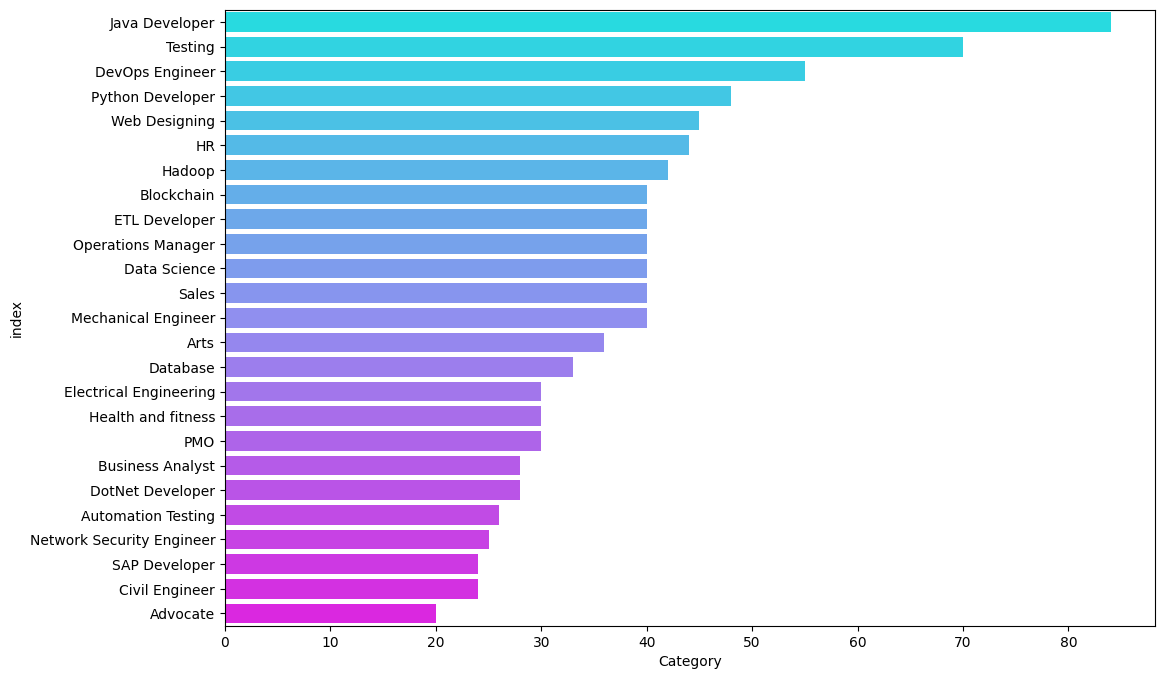

In [133]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'],y=category['index'],palette='cool')
plt.show()

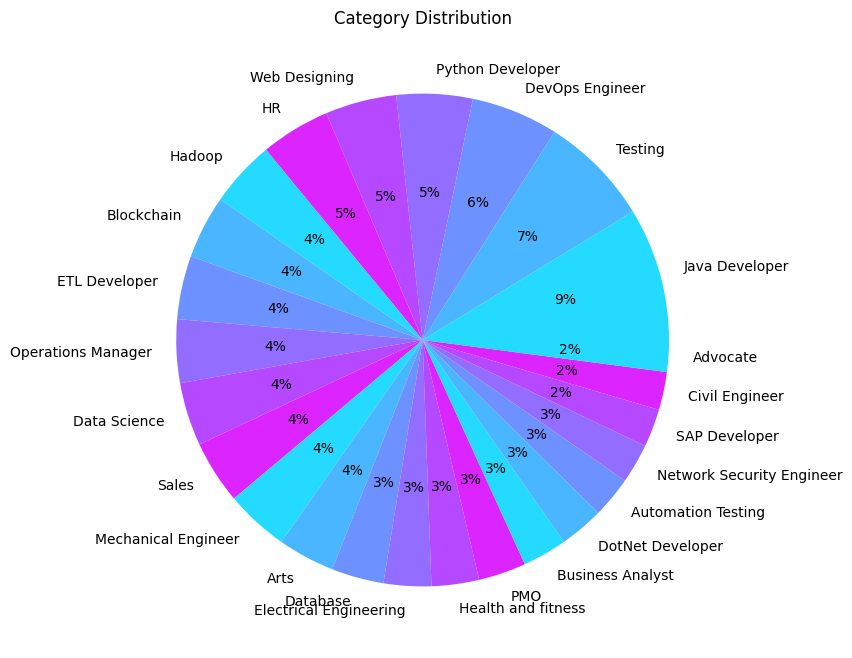

In [134]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

##Text-preprocessing

In [135]:
import re
import nltk

In [136]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
from nltk.corpus import stopwords
import string

In [139]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [140]:
def cleanResume(text):

    text  = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text  = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text  = re.sub('#\S+', '', text)  # remove hashtags
    text  = re.sub('@\S+', '  ', text)  # remove mentions
    text  = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text  = re.sub(r'[^\x00-\x7f]',r' ', text)
    text  = re.sub('\s+', ' ', text)  # remove extra whitespace

    return text

In [141]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))

In [142]:
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [143]:
# lower casing, tokenizing , removing stopwords, stemming all done in this function

In [144]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [145]:
df['cleaned'] = df['cleaned'].apply(transform_text)

In [146]:
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may 2013 may 2017 b e uit rgpv dat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...


In [147]:
# now encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [148]:
df['encoded'] = le.fit_transform(df['Category'])

In [149]:
df.head()

,Category,Resume,cleaned,encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may 2013 may 2017 b e uit rgpv dat...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...,6


<Axes: xlabel='encoded', ylabel='Count'>

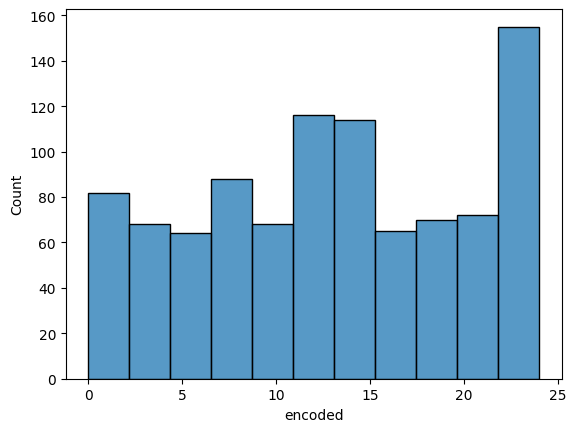

In [150]:
sns.histplot(df['encoded'])


In [164]:
from wordcloud import WordCloud

In [167]:
wc = WordCloud(background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200)

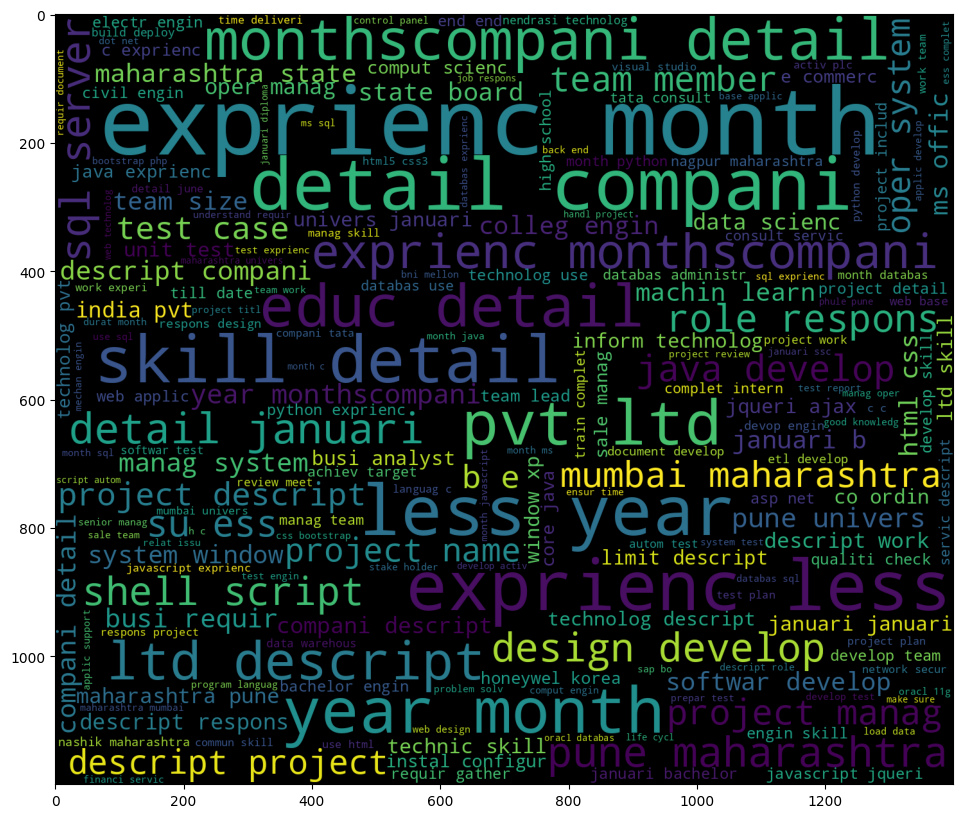

In [168]:
plt.subplots(figsize=(16,10))
plt.imshow(wc.generate(df['cleaned'].str.cat(sep=" ")))

In [169]:
# finding the top 30 words

corpus = []
for msg in df['cleaned'].tolist(): # The .tolist() method in NLP is used to convert a Pandas Series or DataFrame to a list.
   for word in msg.split():
    corpus.append(word)

len(corpus)

318634

In [170]:
from collections import Counter

In [171]:
Counter(corpus).most_common(30)

[('project', 4076),
 ('exprienc', 3829),
 ('manag', 3655),
 ('compani', 3639),
 ('develop', 3560),
 ('month', 3344),
 ('detail', 3237),
 ('descript', 3130),
 ('test', 2687),
 ('work', 2387),
 ('team', 2159),
 ('data', 2156),
 ('1', 2134),
 ('skill', 2086),
 ('system', 1954),
 ('use', 1884),
 ('engin', 1856),
 ('requir', 1698),
 ('respons', 1649),
 ('report', 1628),
 ('databas', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1472),
 ('design', 1465),
 ('maharashtra', 1449),
 ('oper', 1432),
 ('process', 1408),
 ('applic', 1406),
 ('servic', 1396)]

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfidf = TfidfVectorizer(max_features=1500)

In [158]:
# vectorizing the cleaned data
text = df['cleaned'].values
target = df['encoded'].values
X = tfidf.fit_transform(text).toarray()

In [159]:
X.shape


(962, 1500)

In [160]:
X

array([[0.        , 0.        , 0.        , ..., 0.01597936, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30215762, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.28802423, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06056193, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
target.shape

(962,)

##Modelling

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test = train_test_split(X,target,random_state=2,test_size=0.2)

In [163]:
x_train.shape

(769, 1500)

In [172]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [174]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [175]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'MNB':mnb,
    'GNB':gnb,
    'BNB':bnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [176]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision

In [177]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for SVC
accuracy 1.0
precision 1.0
for KN
accuracy 0.9844559585492227
precision 0.9882802862077473
for MNB
accuracy 0.9896373056994818
precision 0.9908056486843443
for GNB
accuracy 0.9896373056994818
precision 0.9937823834196892
for BNB
accuracy 0.9119170984455959
precision 0.9722091380122467


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for DT
accuracy 0.3160621761658031
precision 0.25047909716800343
for LR
accuracy 1.0
precision 1.0
for RF
accuracy 1.0
precision 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for AdaBoost
accuracy 0.22797927461139897
precision 0.16234887737478412
for BgC
accuracy 1.0
precision 1.0
for ETC
accuracy 1.0
precision 1.0
for GBDT
accuracy 1.0
precision 1.0
for xgb
accuracy 1.0
precision 1.0


In [178]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [179]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,1.000000,1.000000
6,LR,1.000000,1.000000
7,RF,1.000000,1.000000
9,BgC,1.000000,1.000000
10,ETC,1.000000,1.000000
11,GBDT,1.000000,1.000000
12,xgb,1.000000,1.000000
3,GNB,0.989637,0.993782
2,MNB,0.989637,0.990806
1,KN,0.984456,0.988280


In [180]:


import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))


